# Programming Assignment II: Explainability

In this assignment you will train machine learning models and experiment with techniques discussed in the lectures.
This assignment makes use of existing Python libraries for some questions. We have provided links to tutorials/examples if you're not familiar with them yet.

All code that you implement should be in this notebook. You should submit:
* This notebook with your code added. Make sure to add enough documentation. Also provide complete answers to the more theoretical questions in this notebook. These questions are followed by an 'answer indent':
> Answer:

The notebook .ipynb should have the name format `Prog_Explainability_Group_X.ipynb`, where X is your programming group ID.

Important notes:
* Deadline for this assignment is **Friday, May 30, 17:00**.
* Send it to both Maria Muratidi (m.mouratidi@uu.nl) and Heysem Kaya (h.kaya@uu.nl), CCing your programming partner.
* Title of the email: [INFOMHCML] Explainability programming assignment submission [X], with X the number of your group.
* There will be a lab session to assist you with the assignment on **Tuesday, May 27, between 11:00-12:45 at DALTON 500 - 6.27 and DALTON 500 - 8.27**.

### Installation

For this assignment, we are going to use the following Python packages:
graphviz, matplotlib, pandas, statsmodels, openpyxl, interpret, and scikit-learn.

In [29]:
# Installing packages
!pip install graphviz
!pip install matplotlib pandas statsmodels openpyxl
!pip install interpret
!pip install scikit-learn --upgrade


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


### Read the data
We are going to use the ChaLearn LAP-FI (First Impressions) Dataset. This dataset contains 10.000 data points, which correspond to videos collected from YouTube and annotated via Amazon Mechanical Turk for the BIG-5 personality impressions: openness, extraversion, conscientiousness, neuroticism, agreeableness.

These five personality impression scores will be used as features to predict the outcome variable: a job interview invitation.

For a detailed description, see the [paper of the dataset](https://ieeexplore.ieee.org/abstract/document/7966041?casa_token=1Y03H5ykCqsAAAAA:VLhCcjAgByJ2hTdKhulmIUiXIVepEJfFyB7HM0XVts7bN8Gi8wMsiTT0qZ--I_kq8wiUHIpPN7es).


1.   If you use Google Colab, upload 'all_df.csv' (you can find this file on blackboard) through the upload button in the Files tab.
  - Copy the path of the file;
  - Run the cell below with your path. This will ask you for permission to access your Google Drive files and then you can access the data.
2.   If you are running this notebook at your own machine (jupyter notebook), locate the 'all_df.csv' file in the same folder this notebook exists. Then you can run the second cell below.

   



In [30]:
# Run this cell only if you use Google Colab
from google.colab import drive
drive.mount('/content/gdrive')

# Make sure you uploaded all_df.csv to your Google Drive and change the path
# to the directory it is located in (usually in content/gdrive/MyDrive/...)
%cd  '/content/gdrive/MyDrive/HCML/Explainability'

ModuleNotFoundError: No module named 'google'

In [31]:
# Run this cell (both when working locally or with Google Colab)
import pandas as pd

data = pd.read_csv("all_df.csv")
print("Data loaded")

Data loaded


### Loading and preprocessing the data
There are 6000, 2000 and 2000 examples for training, validation/development and test set respectively. In the data this is indicated by the feature `split`.

The training set is used to train models, the validation/development set to optimize the models hyper-parameters, and the test set to evaluate the trained model.

In [32]:
import numpy as np

# global variables
FEATURE_NAMES = ['extraversion', 'neuroticism', 'agreeableness', 'conscientiousness', 'openness']
LABEL_NAME = 'interview'

def load_data():
    def split_feature_label(data_set):
        features = data_set[FEATURE_NAMES]
        labels = data_set[LABEL_NAME]
        return features, labels

    train_set = data[data['split'] == 'training']
    val_set = data[data['split'] == 'validation']
    test_set = data[data['split'] == 'test']

    train_features, train_labels = split_feature_label(train_set)
    val_features, val_labels = split_feature_label(val_set)
    test_features, test_labels = split_feature_label(test_set)

    return train_features, train_labels, val_features, \
        val_labels, test_features, test_labels

# Load the data with the function above
(train_features, train_labels, dev_features, \
        dev_labels, test_features, test_labels) = load_data()

# Part 1. Different models

### **1. Linear Regression**

Train a linear regression model (we recommend the `statsmodels.api` package with the ordinary least squares model `sm`).

Hint: to get a linear regression model, you should manually add a constant variable (usually called bias or intercept - that has a fixed value of 1 for all instances) to the data, either by adding it column yourself or by using the `add_constant()` function.



**Q1.1**

Provide the $R^2$ (goodness of fit) statistic and for each feature (+ the bias variable), the following in tabular format:
* Weight estimate (coef)
* SE (standard error of estimates)
* T-statistic

Hint: You can print the summary of the model using `.summary()` to do this. This gives an extensive overview of the performance of a model.

In [33]:
# We recommend the statsmodels package
import statsmodels.api as sm

# Your code to add a bias/intercept variable
train_features_with_bias = sm.add_constant(train_features)

# Train the model and print out the summary
mod = sm.OLS(train_labels, train_features_with_bias)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              interview   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                 1.278e+04
Date:                Wed, 28 May 2025   Prob (F-statistic):               0.00
Time:                        09:24:19   Log-Likelihood:                 10232.
No. Observations:                6000   AIC:                        -2.045e+04
Df Residuals:                    5994   BIC:                        -2.041e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0727      0.00

**Q1.2**

Which three features are the most important?

> Answer:
The most important features have the highest influence on the decision, which is reflected in a higher coefficient value. In the table we can see that the most important features are:

1. Conscientiousness
2. Agreeableness
3. Neuroticism

Noticebly, the difference between the coefficients are quite small


**Q1.3**

How does the predicted 'interview' score change with an 0.1 increase of the 'conscientiousness' feature given that all other feature values remain the same?

> Answer:
Considering that conscientiousness has a weight of 0.3293, we know that for one unit the interview score increases with that amount. Therefore, with a 0.1 increase, we gain 0.1*0.3293 = 0.03292 on the interview score

**Q1.4**

Show bar graph illustrations of the feature effects for the first two validation set instances.

> Answer:

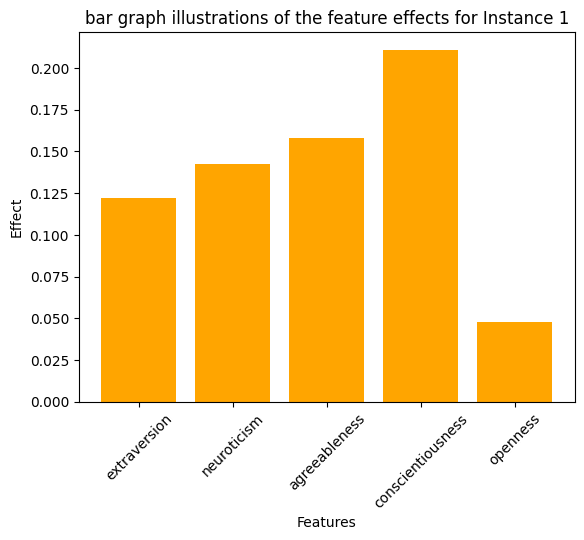

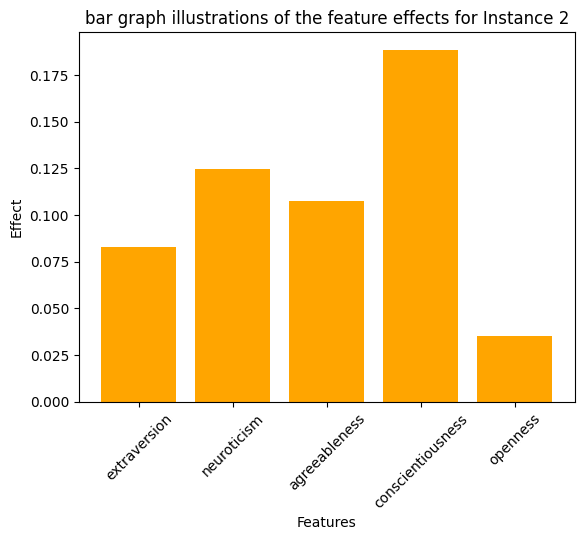

In [34]:
import matplotlib.pyplot as plt

# Compute the Feature Effects
def feature_effects(instance, weights):
    features = instance.columns.tolist()
    contribution = []
    for f in features:
        contribution.append(instance.iloc[0][f] * weights[f])
    return features, contribution

# Show bar graphs
def plot_bar(features, contributions, name):
    plt.bar(features, contributions, color='orange')
    plt.xlabel('Features')
    plt.ylabel('Effect')
    plt.title(f'bar graph illustrations of the feature effects for {name}')
    plt.xticks(rotation=45)
    plt.show()

coefs = res.params
features, instance1 = feature_effects(dev_features.iloc[[0]], coefs)
features, instance2 = feature_effects(dev_features.iloc[[1]], coefs)

plot_bar(features, instance1, "Instance 1")
plot_bar(features, instance2, "Instance 2")

**Q1.5**

Reflection: why would training a regression tree not work well for this dataset in terms of model interpretability? And under what conditions could the dataset be used with a decision tree to yield an interpretable model?

> Answer:

A regression tree is not a good fit for this kind of data due to the internal working of the regression tree. A regression tree's leaves can be seen as clusters of datapoints, and their corresponding label is the average of these datapoints. To find tresholds to split the data on, a regression tree tries different positions and choses the treshold that minimizes the residuals.

However, this is hard to do in this particular because it has a very linear and independent relationship to the target variable. This means that each feature on its own increase the interview score if its value is increased: e.g. the higher the conscientiousness or openness, the higher your chances of an interview. This makes clustering quite hard, because wherever the treshold is set, the residuals remain roughly the same due to the steady increase. Even if clustering would work, one would get weird cuts between classes rather than a smooth increase, complicating the interpretability.

A regression tree would prove an valuable option if the relation between features and target variable were more complicated than linear: e.g if conscientiousness only has a positive inpact until a certain peak and lowers your chances if it is larger than that. Moreover, this could also happen when features would interact more, e.g if conscientioussness is beneficial only if openness is below a certain point, otherwise it is detrimental. This would make the data less smooth and more clusterd and therefore more suited for a regression decision tree.

### **2. Explainable Boosting Model**
Train an Explainable Boosting Machine (EBM) with [InterpretML](https://interpret.ml/docs/ebm.html). EBM is a Generalized Additive Model (GAM) that is highly intelligible and explainable.

The `interpret` package provides both global and local explanation functions: `explain_global()` and `explain_local()` can be used to interpret a ML model.

**Q2.1**

Visualize/provide global (model-wise) feature importances for EBM as a table or figure.

In [35]:
from interpret.glassbox import ExplainableBoostingRegressor
from interpret import show

ebm = ExplainableBoostingRegressor()
ebm.fit(train_features, train_labels)
show(ebm.explain_global())
# EBM Global feature importances

<!-- http://127.0.0.1:7001/4411371168/ -->

**Q2.2**

What are the most important two features in EBM? Are they the same as in the linear model?

> Answer: 
The two most important features in the global EBM are:
1. Conscientiousness
2. Neuroticism

These are slighly different from the linear model, where conscientiousness was first and agreeableness took second place. However, as we can see the differences are quite small between neuroticism and agreeableness here as well.

Now, to have an idea how EBM treats the input and generates the explanation, visualize EBM local explanations on a synthetic instance generated from training set mean feature vector as input and training set mean response as output.



In [ ]:
# EBM Local explanation for training set mean vector with corresponding training set mean label
train_mean_x = pd.DataFrame(train_features.mean(axis=0)).T
train_mean_y = pd.DataFrame([train_labels.mean()])

# ebm_local = ExplainableBoostingRegressor()
#ebm.fit(train_mean_x, train_mean_y)
show(ebm.explain_local(train_mean_x, train_mean_y), 0)

<!-- http://127.0.0.1:7001/5814432304/ -->

   extraversion  neuroticism  agreeableness  conscientiousness  openness
0      0.476146     0.520286       0.548181           0.522731  0.566281
         0
0  0.50378


**Q2.3**

Now, visualize local (instance-wise) feature importances for the first two instances of the development set.

In [37]:
# EBM local explanations for the first two development set instances

# ebm_local = ExplainableBoostingRegressor()
#ebm.fit(train_mean_x, train_mean_y)
show(ebm.explain_local(train_features[:2], train_labels[:2]), 0)

<!-- http://127.0.0.1:7001/5859954128/ -->

**Q2.4**

Let's compare these feature importances with the feature effects in question 1.4.

* Are the feature contribution orderings the same in both models for the two instances?
> Answer:
Feature effects in question 1.4:

Person 1 Model 1: Conscientiousness, Agreeableness, Neuroticism

Person 2 Model 1: Conscientiousness, Neuroticism, Agreeableness

Feature importances now:

Person 1 Model 2: Conscientiousness, Agreeableness, Extraversion

Person 2 Model 2: Neuroticism, Extraversion, Conscientiousness

If we examine these results, the contribution seems quite the same for person one for both models, except that extraversion is deemed more important than neuroticism in this model.
On the other hand, for the second instance there is also one feature difference, yet the order of importance is also different.

* For the second example's explanation, why do you think the contribution of *conscientiousness* is positive, while the contribution of *agreeableness* is negative? (Hint: consider the feature values relative to the training set mean values you calculated / processed in the former subquestion.)
> Answer:
This specific instance has a value that is above average on conscientiousness and below average on agreeableness. Therefore, the model adjusts each contribution to the interpretablility of the model.

# Part 2. Model-Agnostic Methods for Interpreting/Explaining NN

### **3. Training Neural Networks**
Train a one-layer Neural Network (multi-layer perceptron (MLP) Regressor, but with one layer) with the following settings:

- Activation function: ReLU
- Size of the hidden layer: 50 neurons
- Recommended optimizer/solver: Adam

For a tutorial see [Tutorial](https://scikit-learn.org/stable/modules/neural_networks_supervised.html).

**Q3.1**

Apply the trained neural network model to the development set to find the best hyperparameters (such as learning rate). Report the Root Mean Square Error (RMSE) performance measure.

**Note.** A development set RMSE below 0.045 is reasonable, then you can apply the corresponding model on the test set in the next question.

In [38]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import root_mean_squared_error

# Train the MLPRegressor and show RMSE on development set
NN_One_Layer = MLPRegressor(solver='adam', activation='relu', batch_size=64, learning_rate_init = 0.1, alpha=1e-7,
                    hidden_layer_sizes=(50))
NN_One_Layer.fit(train_features, train_labels)

predictions = NN_One_Layer.predict(dev_features)

root_mean_squared_error(dev_labels, predictions)

0.04815212111893451

**Q3.2**

Now use the best settings to report the Root Mean Square Error (RMSE) performance measure on the test set.

It is possible to use the combination of the training and development sets to retrain the model and report the test set performance. You can also use the model that was trained on the training set only.

In [39]:
# RMSE on test set
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import root_mean_squared_error

predictions = NN_One_Layer.predict(test_features)

root_mean_squared_error(test_labels, predictions)

0.051184657811272544

Now we can analyze factors that influence the predictions. Both Partial Dependence Plots (PDP) and Individual Conditional Expectation (ICE) plots can be used to visualize and analyze interaction between the target response and a set of input features of interest.

See the [Documentation](https://scikit-learn.org/stable/modules/partial_dependence.html) on how to use PDPs and ICEs.

**Q3.3**

Generate univariate and bivariate PDPs for the `conscientiousness` and `agreeableness` features with the neural network you trained above.

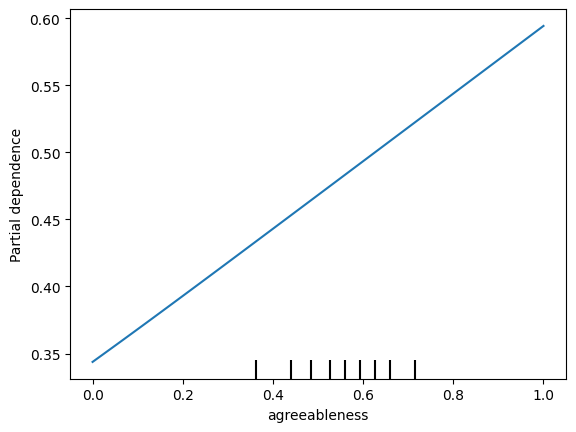

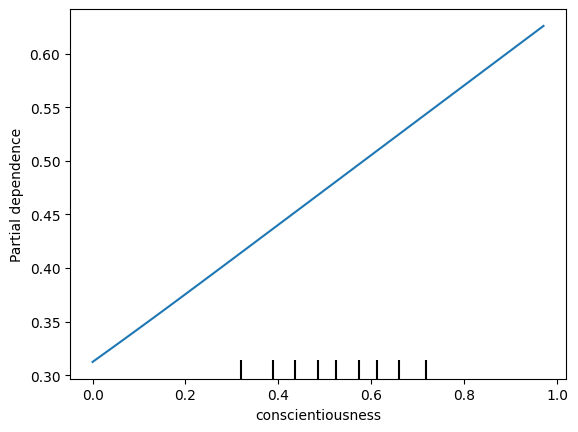

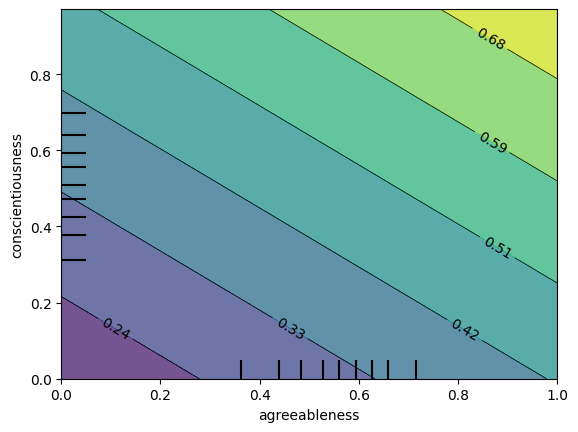

In [40]:
from sklearn.inspection import PartialDependenceDisplay
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
# PDP
PartialDependenceDisplay.from_estimator(NN_One_Layer, train_features, [2])
PartialDependenceDisplay.from_estimator(NN_One_Layer, train_features, [3])
PartialDependenceDisplay.from_estimator(NN_One_Layer, train_features, [(2,3)])

**Q3.4**

What do these plots show?

> Answer: The relationship between both the agreeableness and conscientiousness feature and the target variable interview score is linear. A linear relationship between agreeableness and conscientiousness. Furthermore, the interaction of both features are also lineary correlated to the target variable.

**Q3.5**

Now generate ICE plots for each feature.

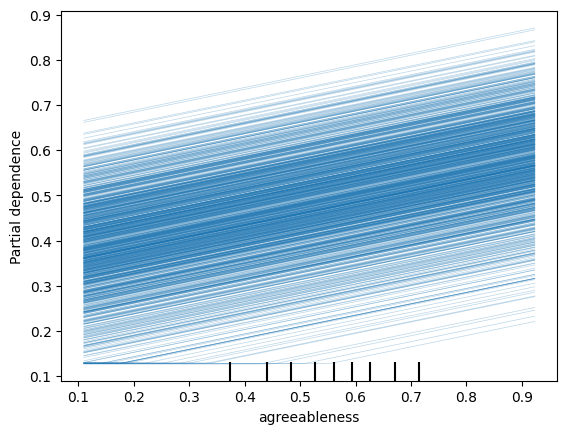

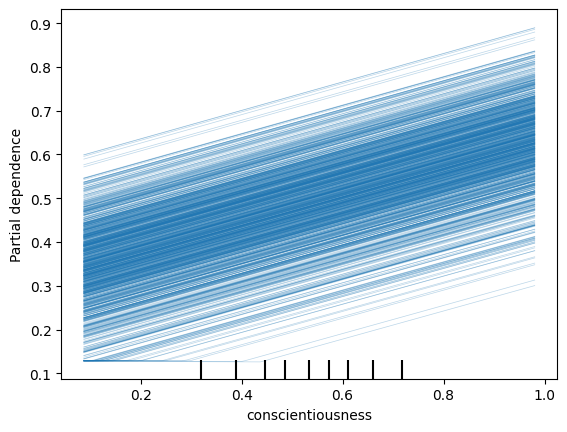

In [41]:
# ICEs
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.inspection import PartialDependenceDisplay

PartialDependenceDisplay.from_estimator(NN_One_Layer, test_features, [2],
    kind='individual')
PartialDependenceDisplay.from_estimator(NN_One_Layer, test_features, [3],
    kind='individual')

**Q3.6**

What can you conclude from ICE plots above?

> Answer: That the individual points shown in ICE have the same linear relationship as the global mean in the PDP.

**Q3.7**

Implement the PDF (Partial Dependence Function) for univariate analysis of the trained NN model.


In [ ]:
def PDF(X, model, feature):
  """
  Input   Dataset 'X', Model 'model', feature_name 'feature'
  Output  x_values: independent variable values
          f_values: corresponding output per x value
  """
  # Note: uncomment the lines below and complete the right hand side (where you see '..' to set them to suitable values, respective explanations are provided for each variable
  num_samples = 100 # set the number of samples/steps to slice the range of the continuous feature, e.g., 100.
  min_val = X[feature].min()     # minimum value of the given feature
  max_val = X[feature].max()      # maximum value of the given feature
  step_size = (max_val-min_val)/num_samples    # see the algorithm in corresponsing lecture slides to calculate the step size as a function of the above variables
  x_values = []    # x_values at which we will calculate the partial function of the given feature
  f_values = []     # the calculated partial function values corresponding to x_values

  x_value = min_val
  for k in range(num_samples - 1):
    # Change part of the data according to the formula of PDF algorithm
    # Let the model predict and calculate the f_value for this k
    X[feature] = x_value
    prediction = model.predict(X)
    result = prediction.mean()
    x_values.append(x_value)
    f_values.append(result)
    x_value += step_size
    
  return x_values, f_values


**Q3.8**

Calculate and visualize the feature importances obtained by your PDF algorithm with a bar graph. How do we calculate the feature importance given the x_values and y_values of the PDF algorithm?

In [56]:
# First calculate the x_values and f_values for each feature
x_extra, y_extra = PDF(test_features.copy(), NN_One_Layer, 'extraversion')
x_neuro, y_neuro = PDF(test_features.copy(), NN_One_Layer, 'neuroticism')
x_agr, y_agr = PDF(test_features.copy(), NN_One_Layer, 'agreeableness')
x_con, y_con = PDF(test_features.copy(), NN_One_Layer, 'conscientiousness')
x_open, y_open = PDF(test_features.copy(), NN_One_Layer, 'openness')

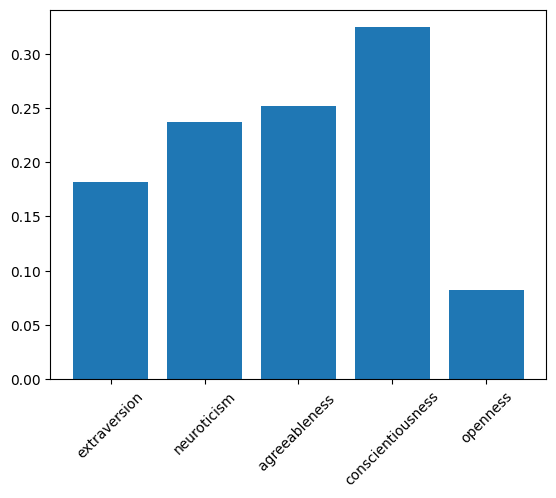

In [58]:
from scipy.stats import linregress
import matplotlib.pyplot as plt

# Fit a linear model per feature, what is the output of this linear model?
slope_extra = linregress(x_extra, y_extra).slope
slope_neuro = linregress(x_neuro, y_neuro).slope
slope_agree = linregress(x_agr, y_agr).slope
slope_con = linregress(x_con, y_con).slope
slope_open = linregress(x_open, y_open).slope

list_features = [slope_extra, slope_neuro, slope_agree, slope_con, slope_open]

plt.bar(["extraversion", "neuroticism", "agreeableness ", "conscientiousness", "openness"], list_features)
plt.xticks(rotation = 45)
plt.show()

**Q3.9**

What are the two most important features obtained by the PDF algorithm for the MLP model? How do these two features compare to the top two features from the Linear Model and the EBM?

> Answer: In the PDF algorithm, the two most important features are:
1. Conscientiousness
2. Agreeableness

For the top two features it matches exactly with the Linear model, and interestingly it matches with Person 1 from both EBM local models as well.


### **4. Permutation Feature Importance**

**Q4.1**

Implement the permutation feature importance algorithm using RMSE as the error function. No existing libraries (barring the RMSE from `sklearn` and a function for random sampling / permutation) are allowed to be used, you will implement it yourself with the framework below.

In [59]:
def PFI(X, labels, model, base_rmse):
  results = []
  
  for feature in X:
    # Create a copy of X_test
    # Scramble the values of the given predictor
    # Calculate the new RMSE
    # Append the increase in MSE to the list of results
    X_test_copy = X.copy()
    X_test_copy[feature] = np.random.permutation(X_test_copy[feature])
    prediction = model.predict(X_test_copy)
    rmse = root_mean_squared_error(labels, prediction)
    importance = rmse - base_rmse
    results.append((feature, importance))
    
  # Put the results into a pandas dataframe and rank the predictors by score
  results_df = pd.DataFrame(results, columns=['feature','importance'])
  results_df = results_df.sort_values(by='importance', ascending=False)
  return results_df

**Q4.2**

Visualize the feature importances obtained by your PFI algorithm with a bar graph.

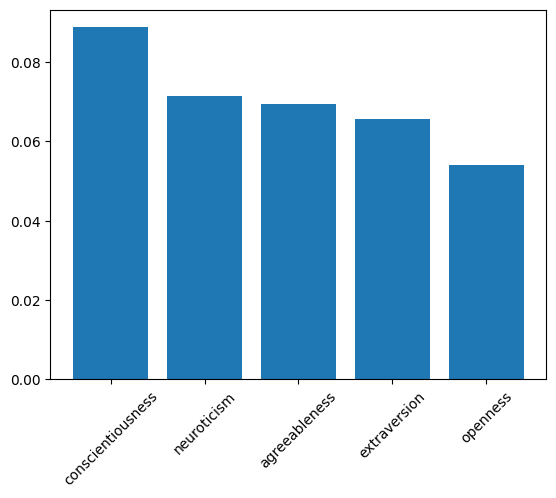

In [61]:
# Bar graph of feature importances
PFI_result = PFI(test_features, test_labels, NN_One_Layer, 0)

plt.bar(PFI_result['feature'], PFI_result['importance'])
plt.xticks(rotation = 45)
plt.show()

**Q4.3**

What are the two most important features obtained by the permutation feature importance algorithm for the MLP model? How do these two features compare to the top two features from the Linear Model and the EBM?

> Answer:
For the last answer, let's repeat all top two features in the model results:
Global EBM results: 
1. Conscientiousness
2. Neuroticism

Linear model:
1. Conscientiousness
2. Agreeableness

Local EBM results:
Person 1 Model 1: 
1. Conscientiousness
2. Agreeableness

Person 2 Model 1: 
1. Conscientiousness
2. Neuroticism

Person 1 Model 2: 
1. Conscientiousness
2. Agreeableness

Person 2 Model 2: 
1. Neuroticism
2. Extraversion

PDF algorithm:
1. Conscientiousness
2. Agreeableness



For the PFI the two most important features are:
1. Conscientiousness
2. Neuroticism

All in all, the PFI gives the same top two features as the Global EBM. All global models seem to agree about number 1. being Conscientiousness. Only the second Person in the second Model of local EBM disagrees. Number 2. is between Agreeableness and Neuroticism. Interestingly, if one of them wasn't number 2, it was number 3 in the other model results.